In [279]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

## Criação dos modelos com as diferentes distâncias:

### Modelo implementado, sem alteração

In [280]:
from math import sqrt
import pandas as pd

class KNNNormal():
    def __init__(self, k):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.x_train = X_train
        self.y_train = y_train
    
    def calculate_euclidean(self, sample1, sample2):
        distance = 0.0
        for i in range(len(sample1)):
            distance += (sample1[i] - sample2[i]) ** 2
        return sqrt(distance)
    
    def nearest_neighbors(self, test_sample):
        distances = []
        for i in range(len(self.x_train)):
            x_train_sample = self.x_train.iloc[i].values
            distance = self.calculate_euclidean(x_train_sample, test_sample)
            distances.append((self.y_train[i], distance))
        distances.sort(key=lambda x: x[1])
        neighbors = []
        for i in range(self.k):
            neighbors.append(distances[i][0])
        return neighbors
    
    def predict(self, test_set):
        predictions = []
        for i in range(len(test_set)):
            test_sample = test_set.iloc[i].values
            neighbors = self.nearest_neighbors(test_sample)
            labels = [sample for sample in neighbors]
            prediction = max(labels, key=labels.count)
            predictions.append(prediction)
        return predictions


### Modelo com distância de Manhattan

In [281]:
from math import sqrt
class KNNManhattan():
  
    def calculate_manhattan(self, sample1, sample2):
        distance = 0.0
        for i in range(len(sample1)):
            distance += abs(sample1[i] - sample2[i]) # Manhattan Distance = sum i to N |x1_i – x2_i|
        return distance
      
    def __init__(self, k):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.x_train = X_train
        self.y_train = y_train
    
    
    def nearest_neighbors(self, test_sample):
        distances = []
        for i in range(len(self.x_train)):
            x_train_sample = self.x_train.iloc[i].values
            distance = self.calculate_manhattan(x_train_sample, test_sample)
            distances.append((self.y_train[i], distance))
        distances.sort(key=lambda x: x[1])
        neighbors = []
        for i in range(self.k):
            neighbors.append(distances[i][0])
        return neighbors
    
    def predict(self, test_set):
        predictions = []
        for i in range(len(test_set)):
            test_sample = test_set.iloc[i].values
            neighbors = self.nearest_neighbors(test_sample)
            labels = [sample for sample in neighbors]
            prediction = max(labels, key=labels.count)
            predictions.append(prediction)
        return predictions

### Modelo com distância de Hamming

In [282]:
from math import sqrt
class KNNHamming():
  
    def calculate_hamming(self, sample1, sample2):
        distance = sum(1 for i in range(len(sample1)) if sample1[i] != sample2[i])
        return distance

    def __init__(self, k):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.x_train = X_train
        self.y_train = y_train
    
    def nearest_neighbors(self, test_sample):
        distances = []
        for i in range(len(self.x_train)):
            x_train_sample = self.x_train.iloc[i].values
            distance = self.calculate_hamming(x_train_sample, test_sample)
            distances.append((self.y_train[i], distance))
        distances.sort(key=lambda x: x[1])
        neighbors = []
        for i in range(self.k):
            neighbors.append(distances[i][0])
        return neighbors
    
    def predict(self, test_set):
        predictions = []
        for i in range(len(test_set)):
            test_sample = test_set.iloc[i].values
            neighbors = self.nearest_neighbors(test_sample)
            labels = [sample for sample in neighbors]
            prediction = max(labels, key=labels.count)
            predictions.append(prediction)
        return predictions

### Modelo com distância de jaccard

In [283]:
from math import sqrt
class KNNJaccard():
  
    def calculate_jaccard(self, sample1, sample2):
        set1 = set(sample1)
        set2 = set(sample2)
        intersection = len(set1.intersection(set2))
        union = len(set1.union(set2))
        distance = 1 - (intersection / union)
        return distance

    def __init__(self, k):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.x_train = X_train
        self.y_train = y_train
    
    def nearest_neighbors(self, test_sample):
        distances = []
        for i in range(len(self.x_train)):
            x_train_sample = self.x_train.iloc[i].values
            distance = self.calculate_jaccard(x_train_sample, test_sample)
            distances.append((self.y_train[i], distance))
        distances.sort(key=lambda x: x[1])
        neighbors = []
        for i in range(self.k):
            neighbors.append(distances[i][0])
        return neighbors
    
    def predict(self, test_set):
        predictions = []
        for i in range(len(test_set)):
            test_sample = test_set.iloc[i].values
            neighbors = self.nearest_neighbors(test_sample)
            labels = [sample for sample in neighbors]
            prediction = max(labels, key=labels.count)
            predictions.append(prediction)
        return predictions

### Modelo com a distância de Chebyshev

In [284]:
from math import pow

class KNNChebyshev():
    

    def calculate_distance(self, sample1, sample2):
        distance = max(abs(x - y) for x, y in zip(sample1, sample2))
        return distance
    
    def __init__(self, k):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.x_train = X_train
        self.y_train = y_train
    
    
    def nearest_neighbors(self, test_sample):
        distances = []
        for i in range(len(self.x_train)):
            x_train_sample = self.x_train.iloc[i].values
            distance = self.calculate_distance(x_train_sample, test_sample)
            distances.append((self.y_train[i], distance))
        distances.sort(key=lambda x: x[1])
        neighbors = []
        for i in range(self.k):
            neighbors.append(distances[i][0])
        return neighbors
    
    def predict(self, test_set):
        predictions = []
        for i in range(len(test_set)):
            test_sample = test_set.iloc[i].values
            neighbors = self.nearest_neighbors(test_sample)
            labels = [sample for sample in neighbors]
            prediction = max(labels, key=labels.count)
            predictions.append(prediction)
        return predictions

In [285]:
scaler = MinMaxScaler()

### Função para escolher o melhor valor de K em cada algoritmo

In [286]:
def find_best_k(X_train, X_test, y_train, y_test,modelo):
    # Testando diferentes valores de K
    Ks = [1,2,3,4,5,6,7]
    accs = []
    for k in Ks:
        if modelo==KNN:
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            acc = knn.score(X_test, y_test)
            accs.append(acc)
        elif modelo==KNNNormal:
            knn = KNNNormal(k)
            knn.fit(X_train, y_train)
            Y_pred=knn.predict(X_test)
            accs.append(accuracy_score(y_test,Y_pred))
        elif modelo==KNNManhattan:
            knn = KNNManhattan(k)
            knn.fit(X_train, y_train)
            Y_pred=knn.predict(X_test)
            accs.append(accuracy_score(y_test,Y_pred))
        elif modelo==KNNHamming:
            knn = KNNHamming(k)
            knn.fit(X_train, y_train)
            Y_pred=knn.predict(X_test)
            accs.append(accuracy_score(y_test,Y_pred))
        elif modelo==KNNJaccard:
            knn = KNNJaccard(k)
            knn.fit(X_train, y_train)
            Y_pred=knn.predict(X_test)
            accs.append(accuracy_score(y_test,Y_pred))
        elif modelo==KNNChebyshev:
            knn = KNNChebyshev(k)
            knn.fit(X_train, y_train)
            Y_pred=knn.predict(X_test)
            accs.append(accuracy_score(y_test,Y_pred))
    # Encontrando o melhor valor de K
    best_k = Ks[accs.index(max(accs))]
    return best_k

## Tratamento dos dados e teste dos modelos.
### DATASET 1 - Letras - Dados numéricos

In [288]:
dataset = pd.read_csv('letter.csv')

In [289]:
dataset.head()

,id,'x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx','class'
0,1,2,4,4,3,2,7,8,2,9,11,7,7,1,8,5,6,Z
1,2,4,7,5,5,5,5,9,6,4,8,7,9,2,9,7,10,P
2,3,7,10,8,7,4,8,8,5,10,11,2,8,2,5,5,10,S
3,4,4,9,5,7,4,7,7,13,1,7,6,8,3,8,0,8,H
4,5,6,7,8,5,4,7,6,3,7,10,7,9,3,8,3,7,H


In [290]:
X = dataset.iloc[1:1000, 1:-1]
y = dataset.iloc[1:1000, -1].values


In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [292]:
accuracy_list = []

In [293]:
accuracy_list

[]

## Teste 1
### Modelo que obtemos diretamente a partir do sklearn

In [294]:
#find_best_k(X_train, X_test, y_train, y_test,KNN)

In [295]:
KNN=KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train,y_train)
Y_pred=KNN.predict(X_test)
print("Accuracy = ", accuracy_score(y_test,Y_pred))
accuracy_list.append(accuracy_score(y_test,Y_pred))

Accuracy =  0.6166666666666667


## Teste 2
### Código do modelo, sem a alteração

In [296]:
#find_best_k(X_train, X_test, y_train, y_test,KNNNormal)

In [297]:
KNN2=KNNNormal(7) #our model
KNN2.fit(X_train,y_train)

In [298]:
Y_pred=KNN2.predict(X_test)
print("Accuracy = ", accuracy_score(y_test,Y_pred))
accuracy_list.append(accuracy_score(y_test,Y_pred))

Accuracy =  0.6533333333333333


## Teste 3
### Distância de Manhattan

In [299]:
#find_best_k(X_train, X_test, y_train, y_test,KNNManhattan)

In [300]:
KNN3=KNNManhattan(7) #our model
KNN3.fit(X_train,y_train)

In [301]:
Y_pred=KNN3.predict(X_test)
print("Accuracy = ", accuracy_score(y_test,Y_pred))
accuracy_list.append(accuracy_score(y_test,Y_pred))

Accuracy =  0.6933333333333334


## Teste 4
### Distância de Hamming - Neste teste foi a melhor porque se tratam de dados categóricos e esta distância tem em conta esses dados ao medir a quantidade o numero de caracteristicas categóricas em que os pontos diferem.

In [302]:
#find_best_k(X_train, X_test, y_train, y_test,KNNHamming)

In [303]:
KNN4=KNNHamming(4) #our model
KNN4.fit(X_train,y_train)

In [304]:
Y_pred=KNN4.predict(X_test)
print("Accuracy = ", accuracy_score(y_test,Y_pred))
accuracy_list.append(accuracy_score(y_test,Y_pred))

Accuracy =  0.6


## Teste 5
### Distância de Jaccard 

In [305]:
#find_best_k(X_train, X_test, y_train, y_test,KNNJaccard)

In [306]:
KNN5=KNNJaccard(7) #our model
KNN5.fit(X_train,y_train)

In [307]:
Y_pred=KNN5.predict(X_test)
print("Accuracy = ", accuracy_score(y_test,Y_pred))
accuracy_list.append(accuracy_score(y_test,Y_pred))

Accuracy =  0.22666666666666666


## Teste 6
### Distância de Chebyshev

In [308]:
#find_best_k(X_train, X_test, y_train, y_test,KNNChebyshev)

In [309]:
KNN6=KNNChebyshev(3) #our model
KNN6.fit(X_train,y_train)

In [310]:
Y_pred=KNN6.predict(X_test)
print("Accuracy = ", accuracy_score(y_test,Y_pred))
accuracy_list.append(accuracy_score(y_test,Y_pred))

Accuracy =  0.63


### Análise

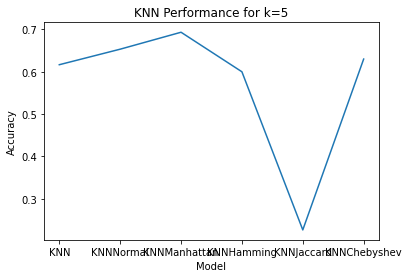

In [311]:
plt.plot(accuracy_list)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("KNN Performance for k=5")
plt.xticks(range(6), ['KNN','KNNNormal','KNNManhattan','KNNHamming','KNNJaccard','KNNChebyshev'])
plt.show()


### Neste dataset, todos as medidas tiveram scores similares, com exceção para Hamming que se destacou. Uma possivel justificação para isso é o facto de esta distância transformar as strings de texto em vetores binários, onde cada bit representa a presença ou ausência de uma determinada categoria.

### O KNN com Hamming distance é capaz de lidar com recursos categóricos de forma mais eficiente do que outras medidas de distância, que são baseadas em valores numéricos. Isso ocorre porque as medidas de distância baseadas em valores numéricos podem levar a resultados imprecisos ou irrelevantes quando aplicadas a dados categóricos. Além disso a medida de Hamming  também é capaz de lidar com dados categóricos pouco equilibrados, onde algumas categorias podem ter uma frequência muito baixa, porque considera apenas a presença ou ausência de uma categoria, em vez de seu valor numérico, sendo menos afetado pelo desequilíbrio na frequência das categorias.

### Dataset 2 -  Prever letras - atributos todos numéricos e com medidas

In [335]:
dataset = pd.read_csv('tic-tac-toe.csv')

In [336]:
dataset.head()

,id,'top-left-square','top-middle-square','top-right-square','middle-left-square','middle-middle-square','middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square','Class'
0,1,x,x,x,x,o,o,x,o,o,positive
1,2,x,x,x,x,o,o,o,x,o,positive
2,3,x,x,x,x,o,o,o,o,x,positive
3,4,x,x,x,x,o,o,o,b,b,positive
4,5,x,x,x,x,o,o,b,o,b,positive


In [337]:
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1].values

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
accuracy=[]

## Teste 1
### Distância de Hamming (sem label encoder)

In [339]:
#find_best_k(X_train, X_test, y_train, y_test,KNNHamming)

In [340]:
KNN4=KNNHamming(6) #our model
KNN4.fit(X_train,y_train)
Y1_pred = KNN4.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, Y1_pred))
accuracy.append(accuracy_score(y_test,Y1_pred))

Accuracy =  0.9305555555555556


## Teste 2
### Distância de Jaccard (sem label encoder)

In [343]:
#find_best_k(X_train, X_test, y_train, y_test,KNNJaccard)

In [344]:
KNN5=KNNJaccard(1) #our model
KNN5.fit(X_train,y_train)
Y1_pred = KNN5.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, Y1_pred))
accuracy.append(accuracy_score(y_test,Y1_pred))

Accuracy =  0.6527777777777778


### Fazer Label Encoder para as outras distâncias

In [345]:
for column in dataset.columns:
    if not column in[
       "'Class'"]:
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column])
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Teste 3
### Modelo que obtemos diretamente a partir do sklearn

In [346]:
#find_best_k(X_train, X_test, y_train, y_test,KNN)

In [347]:
KNN=KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train,y_train)
Y_pred=KNN.predict(X_test)
print("Accuracy = ", accuracy_score(y_test,Y_pred))
accuracy.append(accuracy_score(y_test,Y_pred))

Accuracy =  0.84375



## Teste 4
### Código do modelo, sem a alteração

In [348]:
#find_best_k(X_train, X_test,y_train, y_test,KNNNormal)

In [349]:
KNN2=KNNNormal(3) #our model
KNN2.fit(X_train,y_train)

In [350]:
Y1_pred = KNN2.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, Y1_pred))
accuracy.append(accuracy_score(y_test,Y1_pred))

Accuracy =  0.8541666666666666


## Teste 5
### Distância de Manhattan 

In [351]:
#find_best_k(X_train, X_test, y_train, y_test,KNNManhattan)

In [352]:
KNN3=KNNManhattan(7) #our model
KNN3.fit(X_train,y_train)

In [353]:
Y1_pred = KNN3.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, Y1_pred))
accuracy.append(accuracy_score(y_test,Y1_pred))

Accuracy =  0.8645833333333334


## Teste 6
### Distância de Chebyshev

In [354]:
#find_best_k(X_train, X_test, y_train, y_test,KNNChebyshev)

In [355]:
KNN6=KNNChebyshev(7) #our model
KNN6.fit(X_train,y_train)

In [356]:
Y1_pred = KNN6.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, Y1_pred))
accuracy.append(accuracy_score(y_test,Y1_pred))

Accuracy =  0.6145833333333334


### Análise

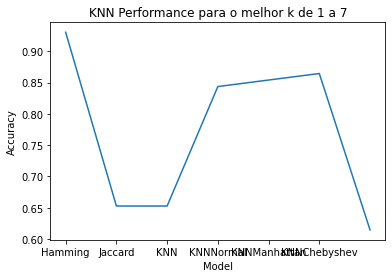

In [357]:
plt.plot(accuracy)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("KNN Performance para o melhor k de 1 a 7")
plt.xticks(range(6), ['Hamming','Jaccard','KNN','KNNNormal','KNNManhattan','KNNChebyshev'])
plt.show()

### Todas as distâncias apresentam resultados semelhantes, à exceção da distância de Jaccard que não é adequada porque ela trata as variáveis como se fossem categóricas binárias, ou seja, apenas verifica se uma variável está presente ou não em cada letra. Isso pode não reflete a real diferença entre as medidas das letras e leva a resultados maus na classificação.

### Dataset 3 -  risco de créditos  

In [358]:
dataset = pd.read_csv('csv_result-dataset_31_credit-g.csv')
dataset.tail()

,id,'checking_status','duration','credit_history','purpose','credit_amount','savings_status','employment','installment_commitment','personal_status',...,'property_magnitude','age','other_payment_plans','housing','existing_credits','job','num_dependents','own_telephone','foreign_worker','class'
995,996,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,997,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,998,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,...,car,38,none,own,1,skilled,1,none,yes,good
998,999,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad
999,1000,0<=X<200,45,critical/other existing credit,used car,4576,100<=X<500,unemployed,3,male single,...,car,27,none,own,1,skilled,1,none,yes,good


In [359]:
dataset.head()
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [360]:
# Fazer uma cópia do X_train
X_train_scaled = X_train.copy()
X_test_scaled=X_test.copy()

selected_columns = []
for column in dataset.columns:
    if not column in ['id',"'checking_status'", "'credit_history'",
       "'purpose'",  "'savings_status'", "'employment'",
        "'personal_status'", "'other_parties'",
        "'property_magnitude'", 
       "'other_payment_plans'", "'housing'",  "'job'",
        "'own_telephone'", "'foreign_worker'", "'class'"]:
        selected_columns.append(column)


# Aplicar o MinMaxScaler apenas às colunas selecionadas na cópia do X_train
X_train_scaled[selected_columns] = scaler.fit_transform(X_train[selected_columns])

# Aplicar o mesmo scaler aos dados de teste selecionados
X_test_scaled[selected_columns] = scaler.transform(X_test[selected_columns])


In [361]:
accuracy=[]

## Teste 1
### Distância de Hamming (sem label encoding)


In [362]:
#find_best_k(X_train_scaled, X_test_scaled, y_train, y_test,KNNHamming)

In [364]:
KNN4=KNNHamming(6) #our model
KNN4.fit(X_train_scaled,y_train)
Y1_pred = KNN4.predict(X_test_scaled)
print("Accuracy = ", accuracy_score(y_test, Y1_pred))
accuracy.append(accuracy_score(y_test,Y1_pred))

Accuracy =  0.7366666666666667


## Teste 2
### Distância de Jaccard (sem label encoding)

In [365]:
#find_best_k(X_train_scaled, X_test_scaled, y_train, y_test,KNNJaccard)

In [366]:
KNN5=KNNJaccard(1) #our model
KNN5.fit(X_train_scaled,y_train)
Y1_pred = KNN5.predict(X_test_scaled)
print("Accuracy = ", accuracy_score(y_test, Y1_pred))
accuracy.append(accuracy_score(y_test,Y1_pred))

Accuracy =  0.68


### Fazer Label Encoder para as outras distâncias

In [370]:
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

for column in ["'checking_status'", "'credit_history'",
       "'purpose'",  "'savings_status'", "'employment'",
        "'personal_status'", "'other_parties'",
        "'property_magnitude'", 
       "'other_payment_plans'", "'housing'",  "'job'",
        "'own_telephone'", "'foreign_worker'"]:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])

# Fazer uma cópia do X_train
X_train_scaled = X_train.copy()
X_test_scaled=X_test.copy()

selected_columns = []
for column in dataset.columns:
    if not column in ['id',"'checking_status'", "'credit_history'",
       "'purpose'",  "'savings_status'", "'employment'",
        "'personal_status'", "'other_parties'",
        "'property_magnitude'", 
       "'other_payment_plans'", "'housing'",  "'job'",
        "'own_telephone'", "'foreign_worker'", "'class'"]:
        selected_columns.append(column)


# Aplicar o MinMaxScaler apenas às colunas selecionadas na cópia do X_train
X_train_scaled[selected_columns] = scaler.fit_transform(X_train[selected_columns])

# Aplicar o mesmo scaler aos dados de teste selecionados
X_test_scaled[selected_columns] = scaler.transform(X_test[selected_columns])

## Teste 3
### Modelo que obtemos diretamente a partir do sklearn

In [371]:
#find_best_k(X_train_scaled, X_test_scaled, y_train, y_test,KNN)

In [372]:
KNN=KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train_scaled,y_train)
Y_pred=KNN.predict(X_test_scaled)
print("Accuracy = ", accuracy_score(y_test,Y_pred))
accuracy.append(accuracy_score(y_test,Y_pred))

Accuracy =  0.6966666666666667


## Teste 4
### Código do modelo sem alteração

In [373]:
#find_best_k(X_train_scaled, X_test_scaled, y_train, y_test,KNNNormal)

In [374]:
KNN2=KNNNormal(7) #our model
KNN2.fit(X_train_scaled,y_train)

In [375]:
Y1_pred = KNN2.predict(X_test_scaled)
print("Accuracy = ", accuracy_score(y_test, Y1_pred))
accuracy.append(accuracy_score(y_test,Y1_pred))

Accuracy =  0.6966666666666667


## Teste 5
### Distância de Manhattan

In [376]:
#find_best_k(X_train_scaled, X_test_scaled, y_train, y_test,KNNManhattan)

In [377]:
KNN3=KNNManhattan(3) #our model
KNN3.fit(X_train_scaled,y_train)

In [378]:
Y1_pred = KNN3.predict(X_test_scaled)
print("Accuracy = ", accuracy_score(y_test, Y1_pred))
accuracy.append(accuracy_score(y_test,Y1_pred))

Accuracy =  0.72


## Teste 6
### Distância de Chebyshev

In [379]:
#find_best_k(X_train_scaled, X_test_scaled, y_train, y_test,KNNChebyshev)

In [380]:
KNN6=KNNChebyshev(6) #our model
KNN6.fit(X_train_scaled,y_train)

In [381]:
Y1_pred = KNN6.predict(X_test_scaled)
print("Accuracy = ", accuracy_score(y_test, Y1_pred))
accuracy.append(accuracy_score(y_test,Y1_pred))

Accuracy =  0.6733333333333333


### Análise

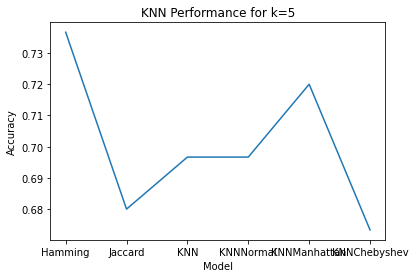

In [383]:
plt.plot(accuracy)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("KNN Performance for k=5")
plt.xticks(range(6), ['Hamming','Jaccard','KNN','KNNNormal','KNNManhattan','KNNChebyshev'])
plt.show()


### Com as medidas todas vemos que a distância de Jaccard desce para muito e a distância de Hamming aumenta bastante pois esta distância é boa em dados categóricos que estão em maioria neste dataset.